In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

import copy

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OneHotEncoder

from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, TensorDataset

In [37]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [38]:
X.shape

(178, 13)

In [39]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [40]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
y = ohe.transform(y)

In [41]:
X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
y.shape

(178, 3)

In [43]:
# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [44]:
X

tensor([[1.4230e+01, 1.7100e+00, 2.4300e+00,  ..., 1.0400e+00, 3.9200e+00,
         1.0650e+03],
        [1.3200e+01, 1.7800e+00, 2.1400e+00,  ..., 1.0500e+00, 3.4000e+00,
         1.0500e+03],
        [1.3160e+01, 2.3600e+00, 2.6700e+00,  ..., 1.0300e+00, 3.1700e+00,
         1.1850e+03],
        ...,
        [1.3270e+01, 4.2800e+00, 2.2600e+00,  ..., 5.9000e-01, 1.5600e+00,
         8.3500e+02],
        [1.3170e+01, 2.5900e+00, 2.3700e+00,  ..., 6.0000e-01, 1.6200e+00,
         8.4000e+02],
        [1.4130e+01, 4.1000e+00, 2.7400e+00,  ..., 6.1000e-01, 1.6000e+00,
         5.6000e+02]])

In [45]:
y

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1

In [46]:
# splitting to form train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
input_size = X_train.shape[1]  # Assuming X_train is a DataFrame
output_size = y_train.shape[1]  # Assuming one-hot encoded labels

In [47]:
class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(input_size, 20)
        self.act = nn.ReLU()
        self.output = nn.Linear(20, output_size)

    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.output(x)
        return x

In [48]:
# initializing the loss metric and optimizer

model = Multiclass()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [49]:
# preparing the  model and training parameters
num_epochs = 300
batch_size = 5
batches_per_epoch = len(X_train) // batch_size

In [50]:
accuracy_highest = - np.inf  #intialized to negative infinity
weights_best = None
history_of_training_loss = []
history_accuracy_of_training = []
history_of_test_loss = []
history_accuracy_of_test = []

No. 0 Epoch: 100%|██████████| 24/24 [00:00<00:00, 64.89batch/s, accuracy=0.6, loss=4.11]


Epoch No. 0 validation: Cross-entropy loss=11.46, Accuracy=24.1%


No. 1 Epoch: 100%|██████████| 24/24 [00:00<00:00, 98.20batch/s, accuracy=0, loss=2.51] 


Epoch No. 1 validation: Cross-entropy loss=2.03, Accuracy=35.2%


No. 2 Epoch: 100%|██████████| 24/24 [00:00<00:00, 118.70batch/s, accuracy=0.2, loss=1.13]


Epoch No. 2 validation: Cross-entropy loss=0.80, Accuracy=57.4%


No. 3 Epoch: 100%|██████████| 24/24 [00:00<00:00, 103.27batch/s, accuracy=0.2, loss=1.14]


Epoch No. 3 validation: Cross-entropy loss=0.61, Accuracy=68.5%


No. 4 Epoch: 100%|██████████| 24/24 [00:00<00:00, 67.11batch/s, accuracy=0.2, loss=1.09]


Epoch No. 4 validation: Cross-entropy loss=0.56, Accuracy=85.2%


No. 5 Epoch: 100%|██████████| 24/24 [00:00<00:00, 68.18batch/s, accuracy=0.2, loss=1.06]


Epoch No. 5 validation: Cross-entropy loss=0.53, Accuracy=83.3%


No. 6 Epoch: 100%|██████████| 24/24 [00:00<00:00, 125.19batch/s, accuracy=0.2, loss=1.06]


Epoch No. 6 validation: Cross-entropy loss=0.51, Accuracy=87.0%


No. 7 Epoch: 100%|██████████| 24/24 [00:00<00:00, 135.95batch/s, accuracy=0.2, loss=1.05]


Epoch No. 7 validation: Cross-entropy loss=0.49, Accuracy=90.7%


No. 8 Epoch: 100%|██████████| 24/24 [00:00<00:00, 39.96batch/s, accuracy=0.2, loss=1.03]


Epoch No. 8 validation: Cross-entropy loss=0.47, Accuracy=90.7%


No. 9 Epoch: 100%|██████████| 24/24 [00:00<00:00, 80.32batch/s, accuracy=0.4, loss=1.01]


Epoch No. 9 validation: Cross-entropy loss=0.46, Accuracy=90.7%


No. 10 Epoch: 100%|██████████| 24/24 [00:00<00:00, 109.14batch/s, accuracy=0.4, loss=0.983]


Epoch No. 10 validation: Cross-entropy loss=0.44, Accuracy=90.7%


No. 11 Epoch: 100%|██████████| 24/24 [00:00<00:00, 59.17batch/s, accuracy=0.4, loss=0.961]


Epoch No. 11 validation: Cross-entropy loss=0.43, Accuracy=88.9%


No. 12 Epoch: 100%|██████████| 24/24 [00:00<00:00, 62.88batch/s, accuracy=0.4, loss=0.937]


Epoch No. 12 validation: Cross-entropy loss=0.41, Accuracy=90.7%


No. 13 Epoch: 100%|██████████| 24/24 [00:00<00:00, 66.98batch/s, accuracy=0.4, loss=0.912]


Epoch No. 13 validation: Cross-entropy loss=0.40, Accuracy=90.7%


No. 14 Epoch: 100%|██████████| 24/24 [00:00<00:00, 77.82batch/s, accuracy=0.4, loss=0.876]


Epoch No. 14 validation: Cross-entropy loss=0.39, Accuracy=92.6%


No. 15 Epoch: 100%|██████████| 24/24 [00:00<00:00, 55.71batch/s, accuracy=0.4, loss=0.859]


Epoch No. 15 validation: Cross-entropy loss=0.38, Accuracy=92.6%


No. 16 Epoch: 100%|██████████| 24/24 [00:00<00:00, 72.11batch/s, accuracy=0.4, loss=0.848]


Epoch No. 16 validation: Cross-entropy loss=0.37, Accuracy=92.6%


No. 17 Epoch: 100%|██████████| 24/24 [00:00<00:00, 65.64batch/s, accuracy=0.6, loss=0.81]


Epoch No. 17 validation: Cross-entropy loss=0.36, Accuracy=94.4%


No. 18 Epoch: 100%|██████████| 24/24 [00:00<00:00, 49.03batch/s, accuracy=0.8, loss=0.798]


Epoch No. 18 validation: Cross-entropy loss=0.34, Accuracy=94.4%


No. 19 Epoch: 100%|██████████| 24/24 [00:00<00:00, 70.88batch/s, accuracy=0.8, loss=0.775]


Epoch No. 19 validation: Cross-entropy loss=0.33, Accuracy=96.3%


No. 20 Epoch: 100%|██████████| 24/24 [00:00<00:00, 63.56batch/s, accuracy=0.8, loss=0.759]


Epoch No. 20 validation: Cross-entropy loss=0.32, Accuracy=96.3%


No. 21 Epoch: 100%|██████████| 24/24 [00:00<00:00, 47.22batch/s, accuracy=0.8, loss=0.738]


Epoch No. 21 validation: Cross-entropy loss=0.32, Accuracy=96.3%


No. 22 Epoch: 100%|██████████| 24/24 [00:00<00:00, 70.20batch/s, accuracy=0.8, loss=0.707]


Epoch No. 22 validation: Cross-entropy loss=0.31, Accuracy=96.3%


No. 23 Epoch: 100%|██████████| 24/24 [00:00<00:00, 77.79batch/s, accuracy=0.8, loss=0.697]


Epoch No. 23 validation: Cross-entropy loss=0.30, Accuracy=96.3%


No. 24 Epoch: 100%|██████████| 24/24 [00:00<00:00, 72.85batch/s, accuracy=0.8, loss=0.676]


Epoch No. 24 validation: Cross-entropy loss=0.29, Accuracy=96.3%


No. 25 Epoch: 100%|██████████| 24/24 [00:00<00:00, 54.07batch/s, accuracy=0.8, loss=0.655]


Epoch No. 25 validation: Cross-entropy loss=0.28, Accuracy=96.3%


No. 26 Epoch: 100%|██████████| 24/24 [00:00<00:00, 70.96batch/s, accuracy=0.8, loss=0.647]


Epoch No. 26 validation: Cross-entropy loss=0.28, Accuracy=96.3%


No. 27 Epoch: 100%|██████████| 24/24 [00:00<00:00, 74.97batch/s, accuracy=0.8, loss=0.612]


Epoch No. 27 validation: Cross-entropy loss=0.27, Accuracy=96.3%


No. 28 Epoch: 100%|██████████| 24/24 [00:00<00:00, 71.31batch/s, accuracy=0.8, loss=0.608]


Epoch No. 28 validation: Cross-entropy loss=0.27, Accuracy=98.1%


No. 29 Epoch: 100%|██████████| 24/24 [00:00<00:00, 75.31batch/s, accuracy=0.8, loss=0.586]


Epoch No. 29 validation: Cross-entropy loss=0.26, Accuracy=98.1%


No. 30 Epoch: 100%|██████████| 24/24 [00:00<00:00, 59.02batch/s, accuracy=0.8, loss=0.579]


Epoch No. 30 validation: Cross-entropy loss=0.25, Accuracy=98.1%


No. 31 Epoch: 100%|██████████| 24/24 [00:00<00:00, 71.40batch/s, accuracy=0.8, loss=0.551]


Epoch No. 31 validation: Cross-entropy loss=0.25, Accuracy=98.1%


No. 32 Epoch: 100%|██████████| 24/24 [00:00<00:00, 58.57batch/s, accuracy=0.8, loss=0.541]


Epoch No. 32 validation: Cross-entropy loss=0.24, Accuracy=98.1%


No. 33 Epoch: 100%|██████████| 24/24 [00:00<00:00, 71.07batch/s, accuracy=0.8, loss=0.524]


Epoch No. 33 validation: Cross-entropy loss=0.24, Accuracy=98.1%


No. 34 Epoch: 100%|██████████| 24/24 [00:00<00:00, 66.48batch/s, accuracy=0.8, loss=0.511]


Epoch No. 34 validation: Cross-entropy loss=0.23, Accuracy=98.1%


No. 35 Epoch: 100%|██████████| 24/24 [00:00<00:00, 82.95batch/s, accuracy=0.8, loss=0.498]


Epoch No. 35 validation: Cross-entropy loss=0.23, Accuracy=98.1%


No. 36 Epoch: 100%|██████████| 24/24 [00:00<00:00, 58.77batch/s, accuracy=0.8, loss=0.484]


Epoch No. 36 validation: Cross-entropy loss=0.22, Accuracy=98.1%


No. 37 Epoch: 100%|██████████| 24/24 [00:00<00:00, 40.69batch/s, accuracy=0.8, loss=0.472]


Epoch No. 37 validation: Cross-entropy loss=0.22, Accuracy=98.1%


No. 38 Epoch: 100%|██████████| 24/24 [00:00<00:00, 73.26batch/s, accuracy=0.8, loss=0.458] 


Epoch No. 38 validation: Cross-entropy loss=0.22, Accuracy=98.1%


No. 39 Epoch: 100%|██████████| 24/24 [00:00<00:00, 85.01batch/s, accuracy=0.8, loss=0.455]


Epoch No. 39 validation: Cross-entropy loss=0.21, Accuracy=98.1%


No. 40 Epoch: 100%|██████████| 24/24 [00:00<00:00, 78.59batch/s, accuracy=0.8, loss=0.434]


Epoch No. 40 validation: Cross-entropy loss=0.21, Accuracy=98.1%


No. 41 Epoch: 100%|██████████| 24/24 [00:00<00:00, 61.24batch/s, accuracy=0.8, loss=0.427]


Epoch No. 41 validation: Cross-entropy loss=0.20, Accuracy=98.1%


No. 42 Epoch: 100%|██████████| 24/24 [00:00<00:00, 60.61batch/s, accuracy=0.8, loss=0.416]


Epoch No. 42 validation: Cross-entropy loss=0.20, Accuracy=98.1%
Early stopping at epoch 42 due to decreasing accuracy.


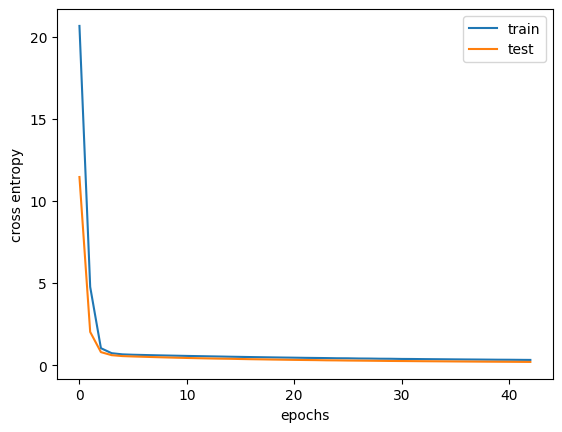

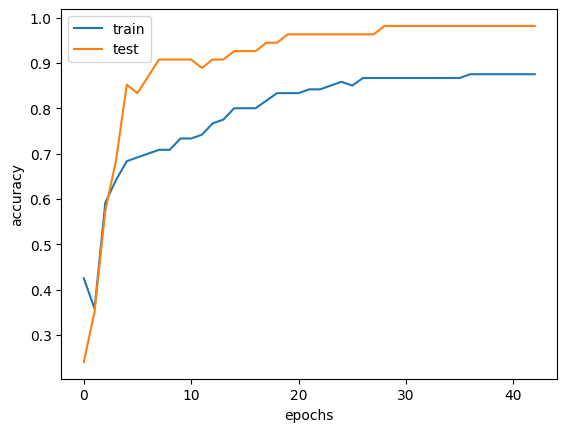

Confusion Matrix:
[[13  0  0]
 [ 1 25  0]
 [ 0  0 15]]


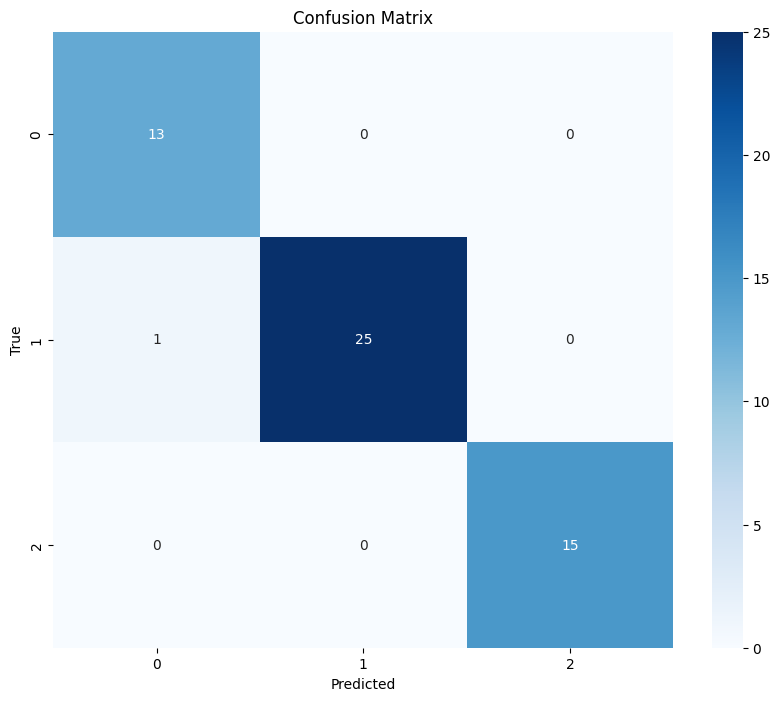

In [51]:
# training loop
for epoch in range(num_epochs):
    loss_in_epoch = []
    accuracy_in_epoch = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"No. {epoch} Epoch")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # model carries out forward pass
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch) # we determine the cross entropy loss

            # model now does backward pass
            optimizer.zero_grad()
            loss.backward()
            # updating weights of the model
            optimizer.step()

            # computing and storing metrics from this batch
            accuracy = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()

            #all batch losses in the epoch are stored
            loss_in_epoch.append(float(loss))

            #all batch accuracies in the epoch are stored
            accuracy_in_epoch.append(float(accuracy))

            bar.set_postfix(
                loss=float(loss),
                accuracy=float(accuracy)
            )

    #Evaluating the model on the test set
    model.eval()

    with torch.no_grad(): #gradient tracking is turned off
        y_pred = model(X_test.float()) # generating the results when hte model is used on the test set
        # we comepare the model test results (y_pred) with the actual values (y_test)
        accuracy=(torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean() #accuracy = correct / total
        accuracy=float(accuracy)
        loss = criterion(y_pred, torch.max(y_test, 1)[1])
        # calculatinfg the cross entropy loss
        #criterion is the loss function criterion = nn.CrossEntropyLoss()

        history_of_training_loss.append(np.mean(loss_in_epoch))
        history_accuracy_of_training.append(np.mean(accuracy_in_epoch))
        history_of_test_loss.append(loss)
        history_accuracy_of_test.append(accuracy)

        if accuracy>accuracy_highest:
            # will store highest accuracy reocrded in any of the epochs
            accuracy_highest=accuracy
            #now we will store the weights of the best model to the weights_best variable
            weights_best=copy.deepcopy(model.state_dict())
        print(f"Epoch No. {epoch} validation: Cross-entropy loss={loss:.2f}, Accuracy={accuracy*100:.1f}%")

          # Check if epoch is greater than 20 and accuracy is decreasing
        if epoch > 20:
            last_15_accuracies = history_accuracy_of_test[-15:]
            if accuracy <= min(last_15_accuracies):
                print(f"Early stopping at epoch {epoch} due to decreasing accuracy.")
                break

# Restoring best model using the best weights identified during evaluation
model.load_state_dict(weights_best)

# Plot the loss and accuracy
plt.plot(history_of_training_loss, label="train")
plt.plot(history_of_test_loss, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(history_accuracy_of_training, label="train")
plt.plot(history_accuracy_of_test, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()


model.eval()
with torch.no_grad():
    test_outputs = model(X_test.float())
    predicted = torch.argmax(test_outputs, dim=1)
    y_true = torch.max(y_test, 1)[1]
    # Computing and printing the confusion matrix
    cm = confusion_matrix(y_true, predicted)
    print("Confusion Matrix:")
    print(cm)

    # Visualizing the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(output_size), yticklabels=range(output_size))
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
